<a href="https://colab.research.google.com/github/shakasom/esda/blob/master/Exploraty_Spatial_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploraty Spatial Data Analysis

## Installation and Data

In [0]:
# Install GDAL and Geopandas
!apt install gdal-bin python-gdal python3-gdal --quiet
!apt install python3-rtree --quiet
!pip install git+git://github.com/geopandas/geopandas.git --quiet
!pip install descartes --quiet

# Install Pysal - Spatial Statistics
!pip install pysal --quiet
!pip install splot --quiet

In [0]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import pysal
from pysal.lib  import weights
from pysal.explore import  esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster


In [2]:
!wget https://www.dropbox.com/s/3qx3efq43cbzc11/london-average-price.geojson

--2019-11-05 09:54:24--  https://www.dropbox.com/s/3qx3efq43cbzc11/london-average-price.geojson
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3qx3efq43cbzc11/london-average-price.geojson [following]
--2019-11-05 09:54:24--  https://www.dropbox.com/s/raw/3qx3efq43cbzc11/london-average-price.geojson
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc6a338a9ea5afa6a2a637f1e48.dl.dropboxusercontent.com/cd/0/inline/ArxR2KEwJNXG6OFOasdL53J7zJN8y9_FJl-LBQCZekv_RBgk1Zr-X9CgceGAda6cAu-_eduheCAAiI1ash8E3YNhHEQfm1NnuYU6E3MfngBJPihJAcpTLVuUO6p--bN8Mig/file# [following]
--2019-11-05 09:54:24--  https://ucc6a338a9ea5afa6a2a637f1e48.dl.dropboxusercontent.com/cd/0/inline/ArxR2KEwJNXG6OFOasdL53J7zJN8y9_FJl-LBQCZekv_RBgk1Zr-X9CgceGAda6

In [3]:
avrg_price_airbnb = gpd.read_file("/content/london-average-price.geojson")
avrg_price_airbnb.head()

,LSOA_CODE,LSOA_NAME,price,geometry
0,E01000001,City of London 001A,156.928571,"MULTIPOLYGON (((532050.879 181817.674, 532021...."
1,E01000002,City of London 001B,183.307692,"MULTIPOLYGON (((532267.748 181643.784, 532254...."
2,E01000003,City of London 001C,135.500000,"MULTIPOLYGON (((532071.310 182159.597, 532135...."
3,E01000004,City of London 001D,188.836858,"MULTIPOLYGON (((531172.252 181124.643, 531133...."
4,E01000005,City of London 001E,144.350649,"MULTIPOLYGON (((533378.878 181459.767, 533439...."


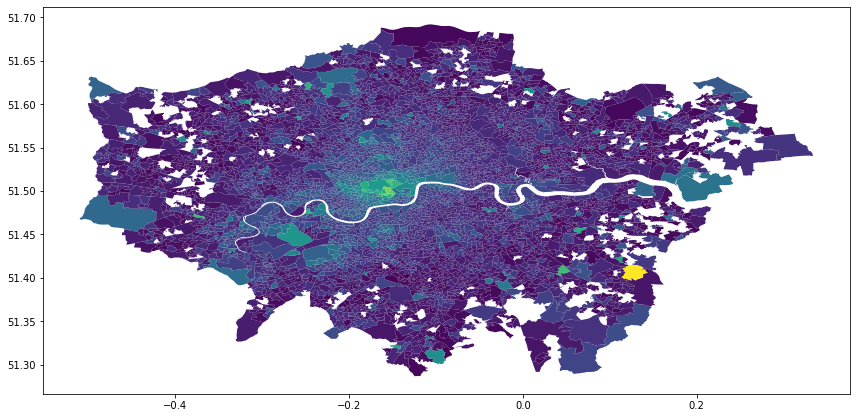

In [9]:
fig, ax = plt.subplots(figsize=(12,10))
avrg_price_airbnb.plot(column="price", ax=ax)
plt.tight_layout()
plt.show()

## Spatial Weights and Spatial Lag


In [4]:
w = weights.Queen.from_dataframe(avrg_price_airbnb, idVariable="LSOA_CODE" )
w.transform = "R"


('WARNING: ', 'E01001066', ' is an island (no neighbors)')
('WARNING: ', 'E01001106', ' is an island (no neighbors)')


/usr/local/lib/python3.6/dist-packages/pysal/lib/weights/weights.py:168: UserWarning: There are 2 disconnected observations 
  Island ids: E01001066, E01001106
  " Island ids: %s" % ', '.join(str(island) for island in self.islands))


In [5]:
#Spatial lag
avrg_price_airbnb["w_price"] = weights.lag_spatial(w, avrg_price_airbnb["price"])
avrg_price_airbnb.head()

,LSOA_CODE,LSOA_NAME,price,geometry,w_price
0,E01000001,City of London 001A,156.928571,"MULTIPOLYGON (((532050.879 181817.674, 532021....",163.841285
1,E01000002,City of London 001B,183.307692,"MULTIPOLYGON (((532267.748 181643.784, 532254....",155.483024
2,E01000003,City of London 001C,135.500000,"MULTIPOLYGON (((532071.310 182159.597, 532135....",152.279928
3,E01000004,City of London 001D,188.836858,"MULTIPOLYGON (((531172.252 181124.643, 531133....",152.232324
4,E01000005,City of London 001E,144.350649,"MULTIPOLYGON (((533378.878 181459.767, 533439....",129.332262


## Global Spatial Autocorrelation

In [8]:
y = avrg_price_airbnb["price"]
moran = Moran(y, w)
moran.I

0.5400173542649614

In [9]:
moran.p_sim

0.001

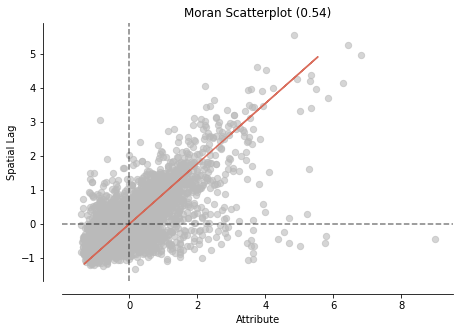

In [10]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.savefig("scatter-moran.png")
plt.show()

## Local Spatial Autocorrelation

In [0]:
# calculate Moran Local 
m_local = Moran_Local(y, w)

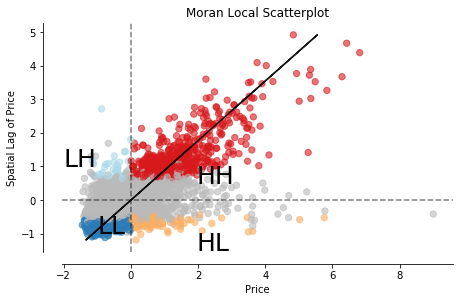

In [12]:
# Plot
fig, ax = moran_scatterplot(m_local, p=0.05)
ax.set_xlabel('Price')
ax.set_ylabel('Spatial Lag of Price')
plt.text(1.95, 0.5, "HH", fontsize=25)
plt.text(1.95, -1.5, "HL", fontsize=25)
plt.text(-2, 1, "LH", fontsize=25)
plt.text(-1, -1, "LL", fontsize=25)
plt.show()

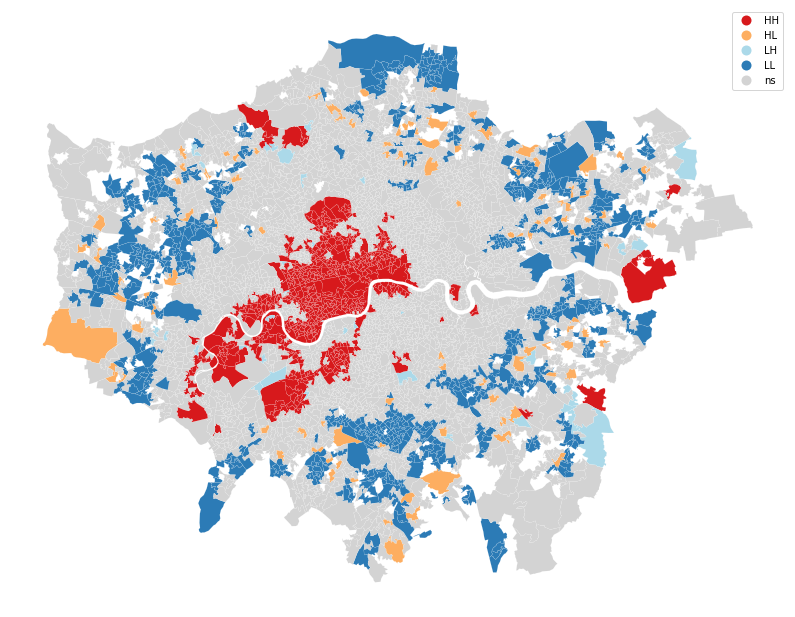

In [13]:
fig, ax = plt.subplots(figsize=(14,12))
lisa_cluster(m_local, avrg_price_airbnb, p=0.05, figsize = (16,12),ax=ax)
plt.show()

# End